# Import Data

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
bank = pd.read_csv("/content/drive/MyDrive/Year2 Term2/FDS/project/Bank Customer Churn Prediction.csv")
bank.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [376]:
data = bank.copy()
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [377]:
data.shape

(10000, 12)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [240]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [241]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [242]:
for i in data.columns:
  if i in ['country', 'gender', 'tenure', 'products_number']:
    print("{} : {}".format(i, data[i].unique()))

country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']
tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
products_number : [1 3 2 4]


In [243]:
for i in data.columns:
  if i in ['country', 'gender']:
    print("{} : {}".format(i, data[i].unique()))

country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


In [244]:
data['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

# EDA

## Imbalance data

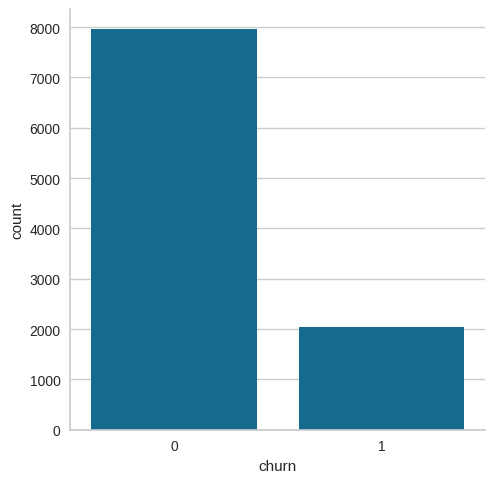

In [245]:
sns.catplot(data, x="churn", kind="count")

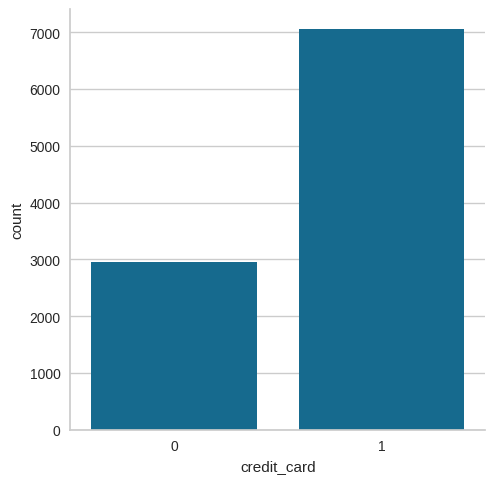

In [246]:
sns.catplot(data, x="credit_card", kind="count")

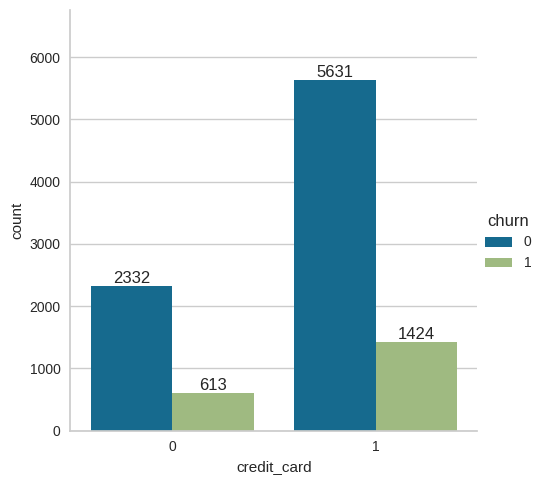

In [247]:
g = sns.catplot(data, x="credit_card", kind="count", hue="churn")

for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

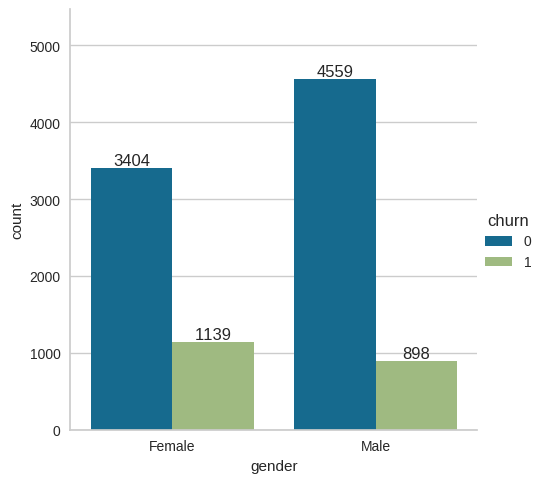

In [248]:
g = sns.catplot(data, x="gender", kind="count", hue="churn")

for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

In [249]:
print("Female churn Ratio: {:.2f}%".format((1139/data[data['gender']=="Female"]["churn"].count())*100))
print("Male churn Ratio: {:.2f}%".format((898/data[data['gender']=="Male"]["churn"].count())*100))

Female churn Ratio: 25.07%
Male churn Ratio: 16.46%


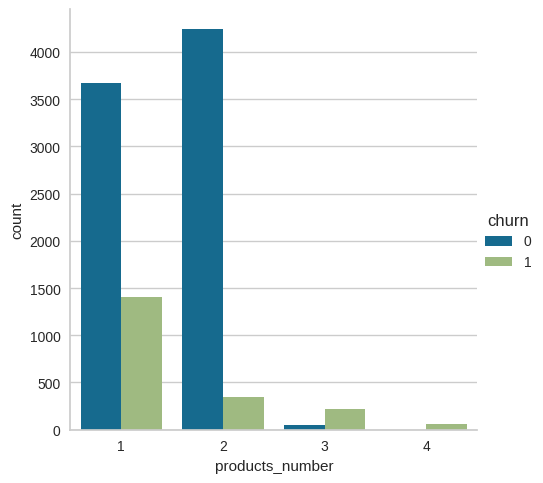

In [250]:
sns.catplot(data, x="products_number", kind="count"
            , hue="churn")

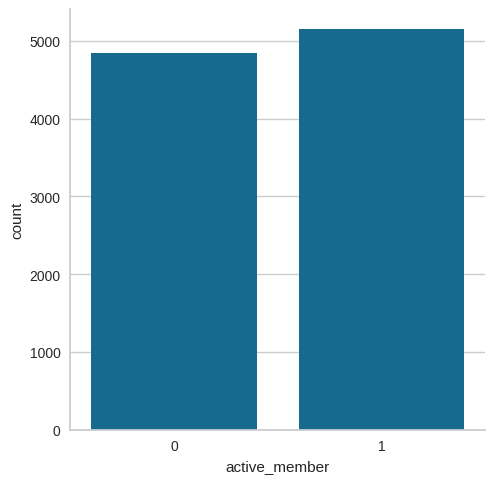

In [251]:
sns.catplot(data, x="active_member", kind="count")

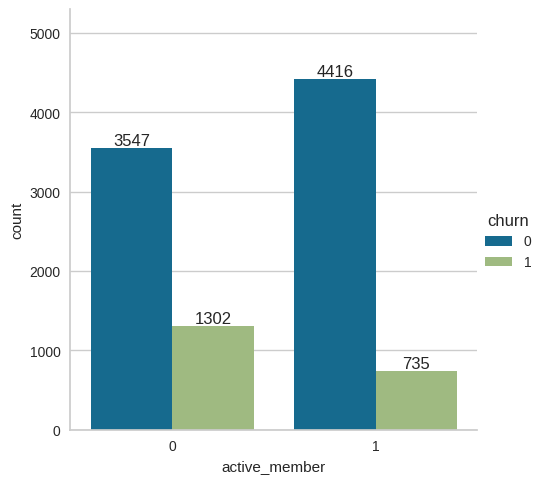

In [252]:
g = sns.catplot(data, x="active_member", kind="count", hue="churn")

for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

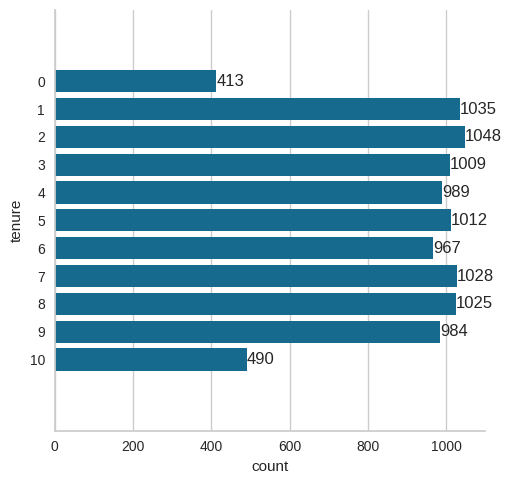

In [253]:
g = sns.catplot(data, y="tenure", kind="count")
for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

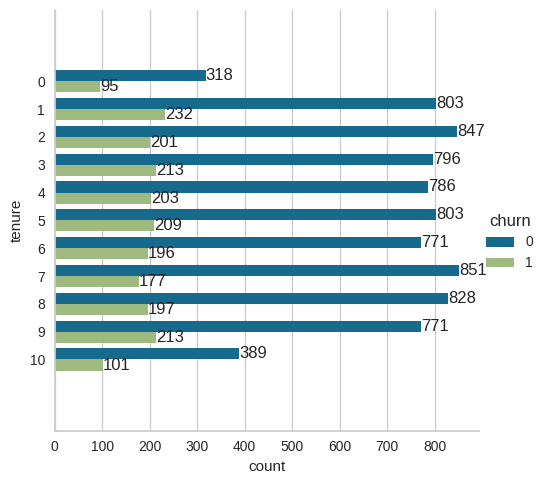

In [254]:
g = sns.catplot(data, y="tenure", kind="count", hue="churn")
for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

In [255]:
tenure_gb = data.groupby(["churn", "tenure"]).count()
tenure_0 = tenure_gb.iloc[0:11,0].values
tenure_1 = tenure_gb.iloc[11:,0].values
tenure_all = data.groupby(["tenure"]).count().iloc[:, 0].values
percen_tenure = pd.DataFrame(tenure_1 / tenure_all * 100, columns=["Percentage"])
d = pd.DataFrame({"tenure": [i for i in range(11)]})
pd.concat([d, percen_tenure], axis=1)

,tenure,Percentage
0,0,23.002421
1,1,22.415459
2,2,19.179389
3,3,21.110010
4,4,20.525784
5,5,20.652174
6,6,20.268873
7,7,17.217899
8,8,19.219512
9,9,21.646341


In [256]:
tenure_0 = [318, 803, 847, 796, 786, 803, 771, 851, 828, ]

## Skewness

<AxesSubplot: xlabel='age', ylabel='Count'>

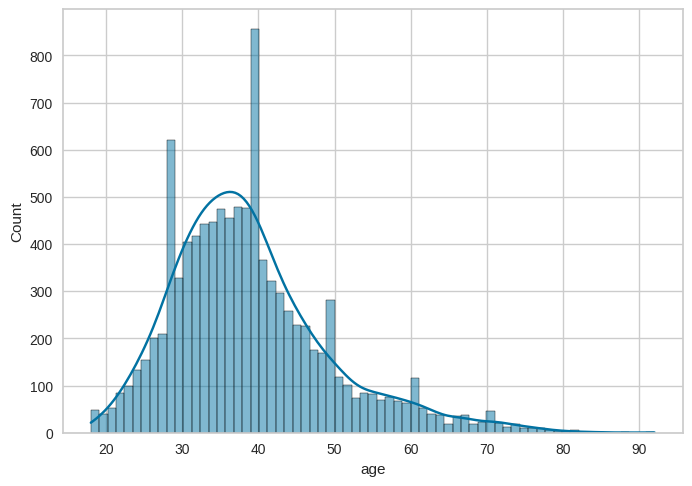

In [257]:
sns.histplot(data, x="age", kde=True)

In [258]:
print("Median: {}".format(data["age"].median()))
print("Mode: {}".format(data["age"].mode()[0]))
print("Mean: {}".format(data["age"].mean()))

Median: 37.0
Mode: 37
Mean: 38.9218


<AxesSubplot: xlabel='age', ylabel='Count'>

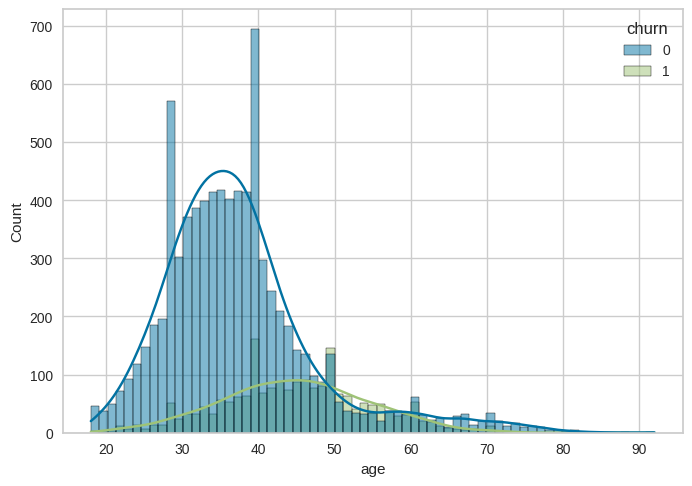

In [259]:
sns.histplot(data, x="age", kde=True, hue="churn")

<AxesSubplot: xlabel='credit_score', ylabel='Count'>

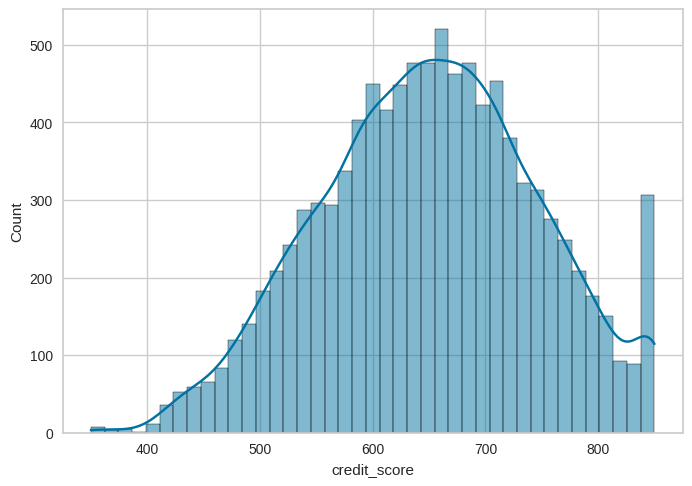

In [260]:
sns.histplot(data, x="credit_score", kde=True)

<AxesSubplot: xlabel='credit_score', ylabel='Count'>

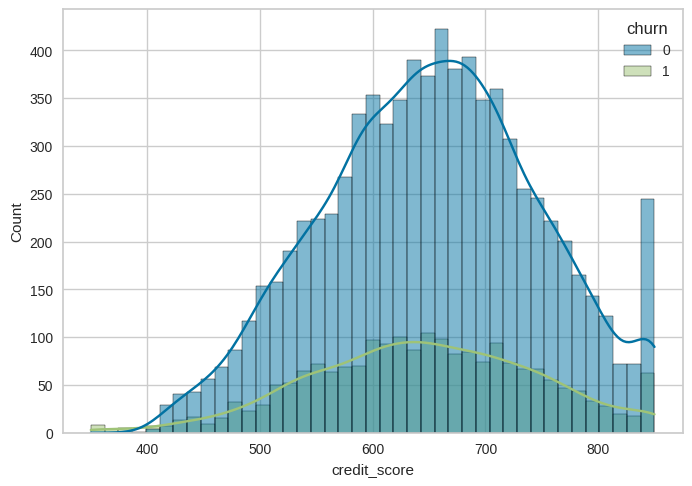

In [261]:
sns.histplot(data, x="credit_score", kde=True, hue="churn")

<AxesSubplot: xlabel='balance', ylabel='Count'>

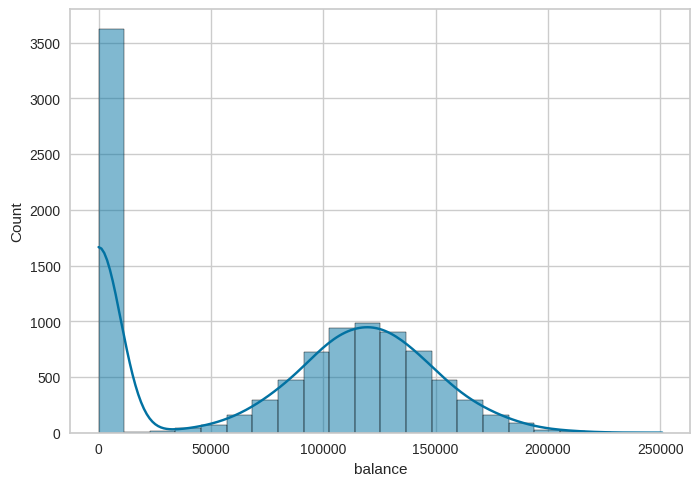

In [262]:
sns.histplot(data, x="balance", kde=True)

<AxesSubplot: xlabel='balance', ylabel='Count'>

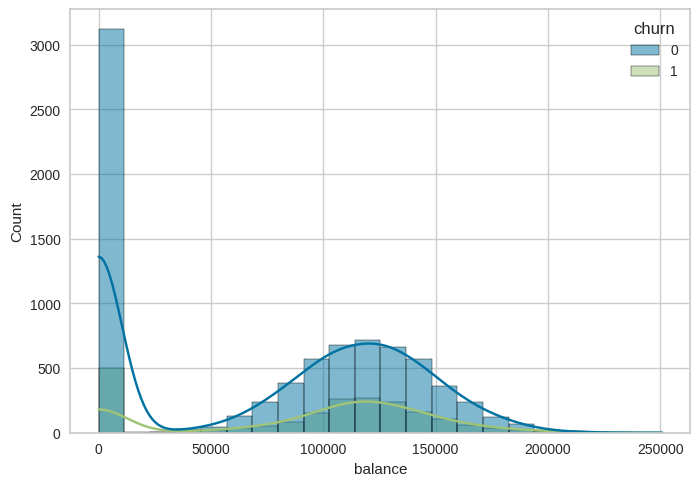

In [263]:
sns.histplot(data, x="balance", kde=True, hue="churn")

<AxesSubplot: xlabel='estimated_salary', ylabel='Count'>

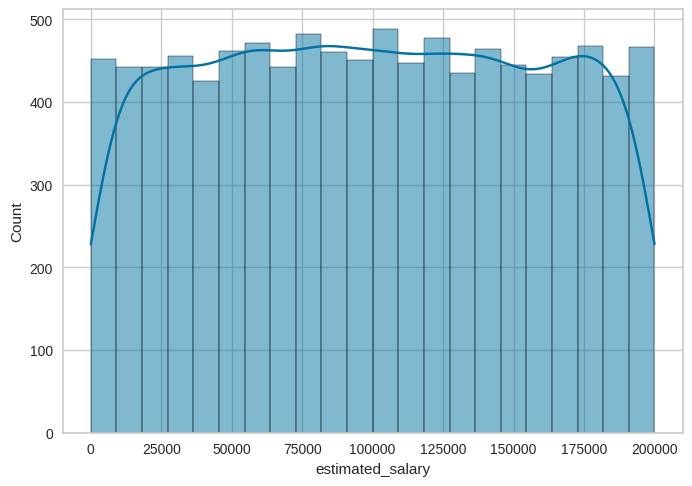

In [264]:
sns.histplot(data, x="estimated_salary", kde=True)

## Log transform

<AxesSubplot: xlabel='estimated_salary', ylabel='Count'>

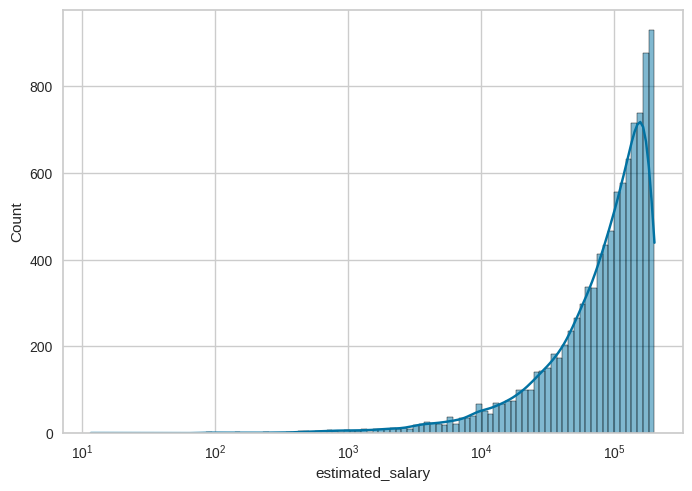

In [265]:
sns.histplot(data, x="estimated_salary", kde=True, log_scale=True)

<AxesSubplot: xlabel='estimated_salary', ylabel='Count'>

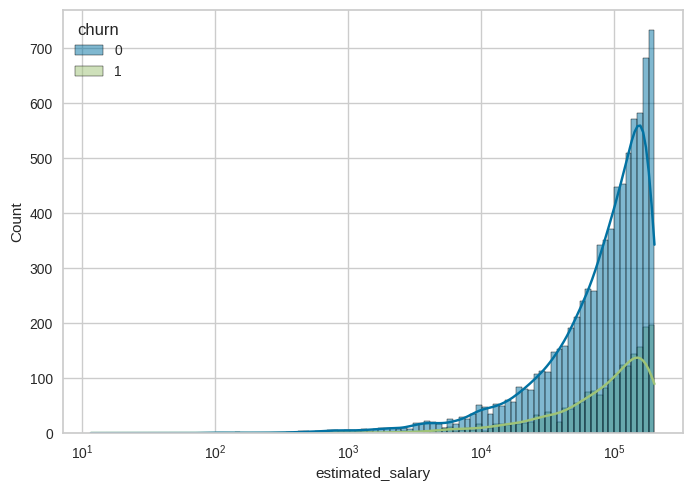

In [266]:
sns.histplot(data, x="estimated_salary", kde=True, log_scale=True, hue="churn")

<AxesSubplot: xlabel='estimated_salary', ylabel='Count'>

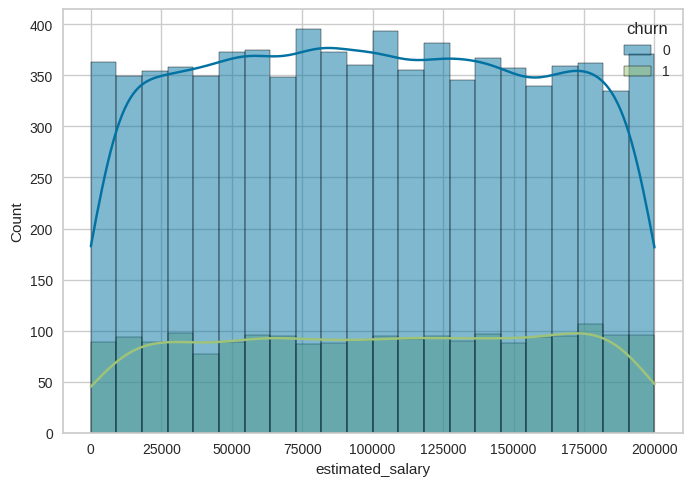

In [267]:
sns.histplot(data, x="estimated_salary", kde=True, hue="churn")

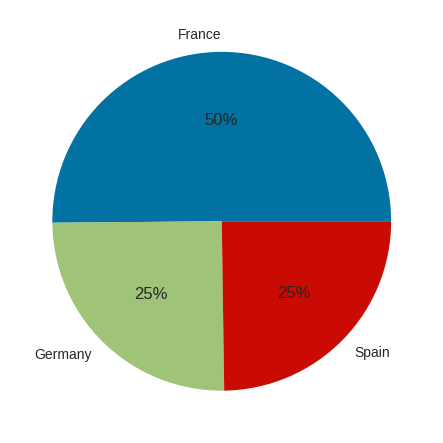

In [268]:
plt.pie(data["country"].value_counts(), labels=data["country"].value_counts().index, autopct='%.0f%%')
plt.show()

In [269]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

## Encoding and Dummies

In [344]:
 from sklearn.preprocessing import LabelEncoder

In [345]:
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])

In [346]:
data = pd.get_dummies(data, columns=['country'])

In [347]:
data.sample(5)

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
2656,15713267,779,0,34,5,0.00,2,0,1,111676.63,0,0,0,1
445,15803406,748,0,26,1,77780.29,1,0,1,183049.41,0,1,0,0
9505,15571281,651,1,28,10,79562.98,1,1,1,74687.37,0,1,0,0
332,15702669,663,1,44,2,117028.60,2,0,1,144680.18,0,0,1,0
4168,15690796,516,1,37,8,0.00,1,1,0,101834.58,0,1,0,0


In [348]:
data.drop("customer_id", inplace=True, axis=1)

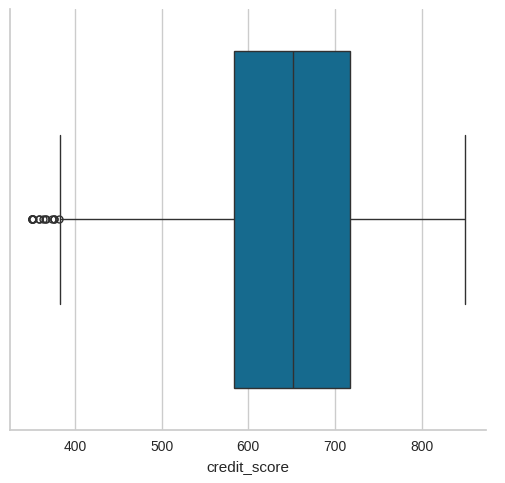

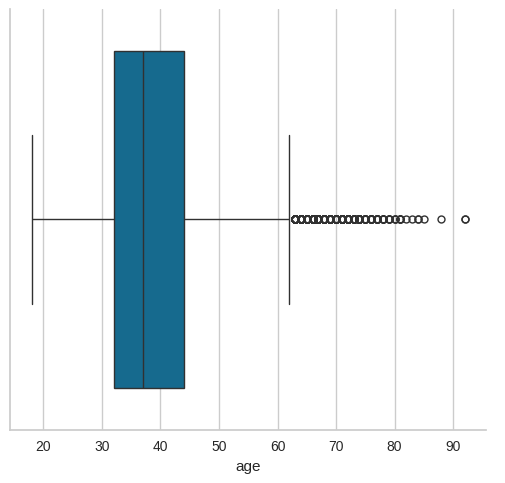

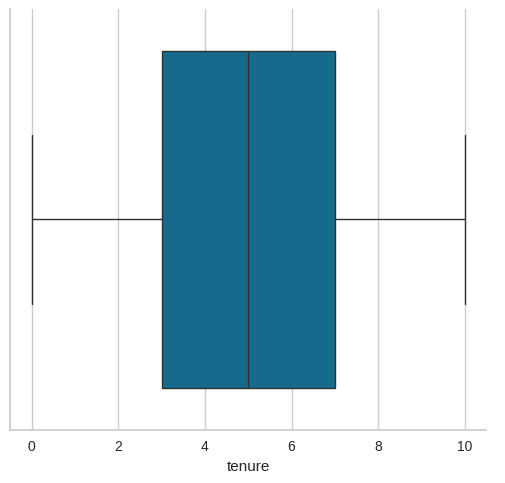

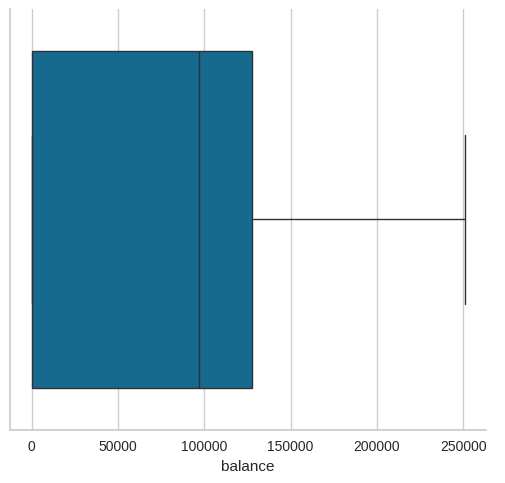

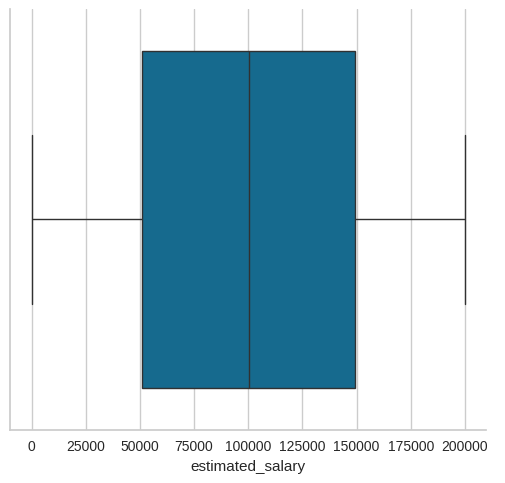

In [349]:
for i in data.columns:
  if i in ["credit_score", "age", "tenure", "balance", "estimated_salary"]:
    sns.catplot(data, x=i, kind="box")

## Clear Outliers

In [350]:
def clear_outlier(col):
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1
  threshold = 1.5
  outlier_min = Q1-threshold*IQR
  outlier_max = Q3+threshold*IQR
  return data[(data[col] > outlier_min) & (data[col] < outlier_max)]

In [351]:
clean_outlier = clear_outlier("credit_score")
clean_outlier = clear_outlier("age")
clean_outlier

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


## Train Test

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
over_train, true_test = train_test_split(clean_outlier, test_size=0.2, random_state=42)

In [354]:
over_train.shape, true_test.shape

((7671, 13), (1918, 13))

In [355]:
over_train['churn'].value_counts()

0    6122
1    1549
Name: churn, dtype: int64

## Fix Imbalance Data (Oversampling Data)

In [356]:
from imblearn.over_sampling import SMOTE

In [357]:
X = over_train.drop(columns="churn")
y = over_train["churn"]

In [358]:
over_sampling = SMOTE(random_state=42)
X_new, y_new = over_sampling.fit_resample(X, y)

In [359]:
oversampled = pd.concat([pd.DataFrame(X_new), pd.DataFrame(y_new)], axis=1)

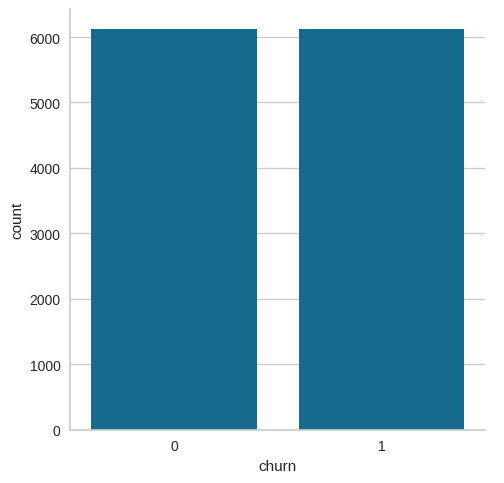

In [360]:
sns.catplot(oversampled, x="churn", kind="count")

In [361]:
oversampled

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn
0,555,1,21,1,0.000000,2,0,0,103901.350000,0,0,1,0
1,639,0,60,5,162039.780000,1,1,1,84361.720000,1,0,0,1
2,753,1,46,8,0.000000,3,1,0,90747.940000,1,0,0,1
3,499,0,28,4,141792.610000,1,1,1,22001.910000,1,0,0,0
4,550,0,42,10,128707.310000,1,1,0,63092.650000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12239,465,0,43,9,124962.923835,1,1,0,128285.789918,0,0,1,1
12240,687,0,51,1,107955.894921,1,1,0,168911.385796,0,1,0,1
12241,631,0,54,4,89366.759063,1,1,0,162537.004283,0,0,1,1
12242,649,0,50,2,125875.785138,1,1,0,65505.327392,1,0,0,1


# Modeling

In [50]:
!pip install pycaret

In [362]:
from pycaret.classification import *

In [363]:
exp = setup(oversampled,
            target="churn",
            session_id = 123,
            normalize = True,
            train_size=0.8,
            use_gpu=True,
            )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(12244, 13)"
4,Transformed data shape,"(12244, 13)"
5,Transformed train set shape,"(9795, 13)"
6,Transformed test set shape,"(2449, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [364]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8843,0.9501,0.8706,0.8953,0.8826,0.7687,0.7691,0.7470
rf,Random Forest Classifier,0.8835,0.9496,0.8722,0.8925,0.8821,0.7670,0.7674,0.9350
lightgbm,Light Gradient Boosting Machine,0.8808,0.9485,0.8655,0.8930,0.8788,0.7615,0.7621,0.1870
xgboost,Extreme Gradient Boosting,0.8806,0.9484,0.8687,0.8898,0.8791,0.7611,0.7615,0.2080
gbc,Gradient Boosting Classifier,0.8636,0.9388,0.8393,0.8824,0.8601,0.7272,0.7283,1.3760
ada,Ada Boost Classifier,0.8475,0.9263,0.8318,0.8589,0.8450,0.6949,0.6954,0.5070
knn,K Neighbors Classifier,0.8465,0.9136,0.8387,0.8520,0.8452,0.6929,0.6932,0.2400
dt,Decision Tree Classifier,0.8273,0.8273,0.8393,0.8196,0.8292,0.6545,0.6549,0.0780
ridge,Ridge Classifier,0.8273,0.0000,0.7787,0.8626,0.8184,0.6545,0.6577,0.0570
lda,Linear Discriminant Analysis,0.8273,0.9018,0.7787,0.8626,0.8184,0.6545,0.6577,0.1140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [373]:
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8255,0.9063,0.7837,0.8552,0.8179,0.6510,0.6533
1,0.8357,0.9210,0.8286,0.8406,0.8345,0.6714,0.6715
2,0.8592,0.9347,0.8449,0.8697,0.8571,0.7184,0.7187
3,0.8541,0.9277,0.8469,0.8592,0.8530,0.7082,0.7082
4,0.8296,0.9254,0.7857,0.8613,0.8218,0.6592,0.6617
5,0.8345,0.9163,0.8122,0.8504,0.8309,0.6691,0.6697
6,0.8386,0.9215,0.7878,0.8773,0.8301,0.6773,0.6808
7,0.8458,0.9193,0.8286,0.8584,0.8432,0.6915,0.6919
8,0.8325,0.9138,0.8016,0.8540,0.8270,0.6649,0.6662


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


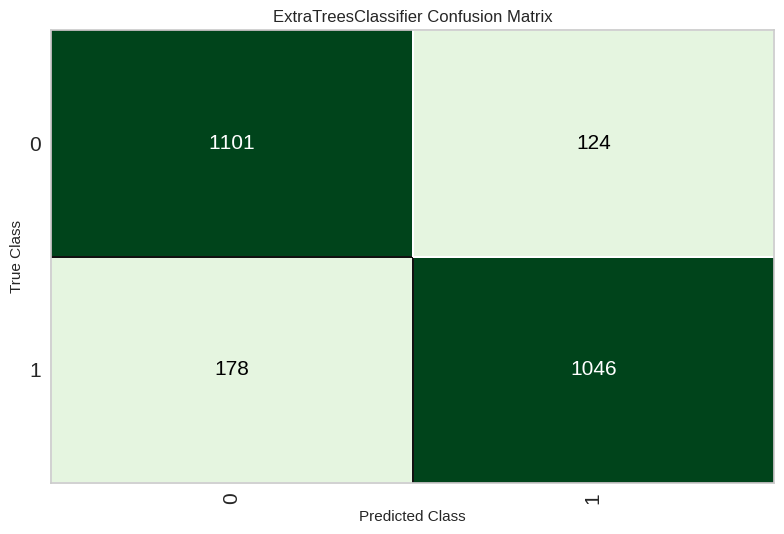

In [365]:
plot_model(best, plot = 'confusion_matrix')

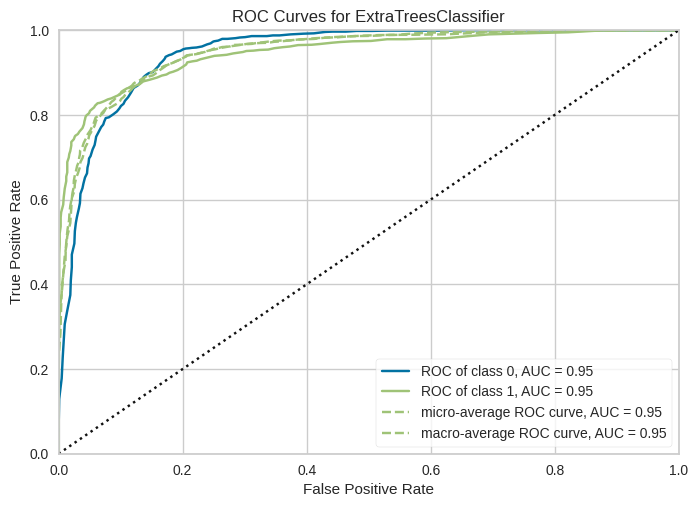

In [374]:
plot_model(best, plot = 'auc')

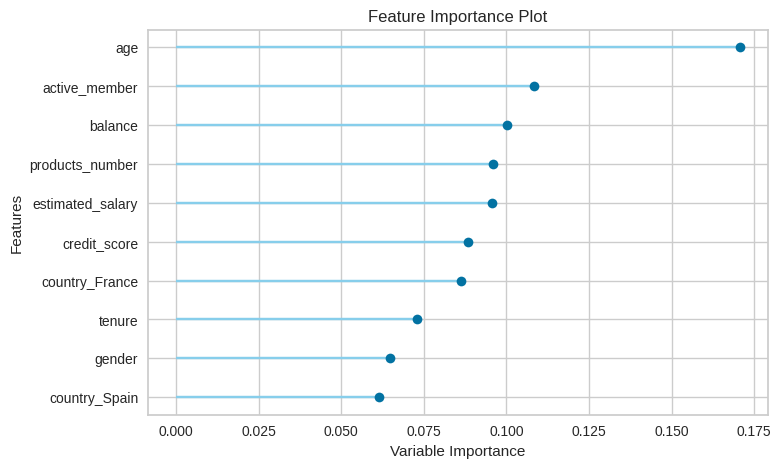

In [367]:
plot_model(best, plot = 'feature')

## Test with normal data

In [368]:
predictions = predict_model(best, data=true_test)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8269,0.8272,0.5305,0.5871,0.5573,0.4501,0.4510


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn,prediction_label,prediction_score
5371,712,1,33,3,153819.578125,1,1,0,79176.093750,1,0,0,1,0,0.94
4418,682,0,47,10,134032.015625,1,1,0,144290.968750,0,0,1,0,0,0.60
39,582,1,41,6,70349.476562,2,0,1,178074.046875,0,1,0,0,0,0.87
2868,545,1,36,8,73211.117188,2,1,0,89587.343750,0,0,1,1,0,0.74
1911,595,1,41,9,0.000000,2,1,0,5967.089844,1,0,0,0,0,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,620,1,37,0,107548.937500,1,1,0,71175.937500,1,0,0,0,0,0.80
4627,605,1,39,7,0.000000,1,0,1,119348.281250,1,0,0,0,0,0.70
9168,681,0,43,8,154100.296875,1,0,0,114659.812500,1,0,0,0,0,0.65
6809,684,0,26,5,87098.906250,1,0,0,106095.820312,1,0,0,0,0,0.66


In [370]:
from sklearn.metrics import confusion_matrix

In [371]:
cm=confusion_matrix(predictions["churn"], predictions["prediction_label"])
cm

array([[1377,  147],
       [ 185,  209]])

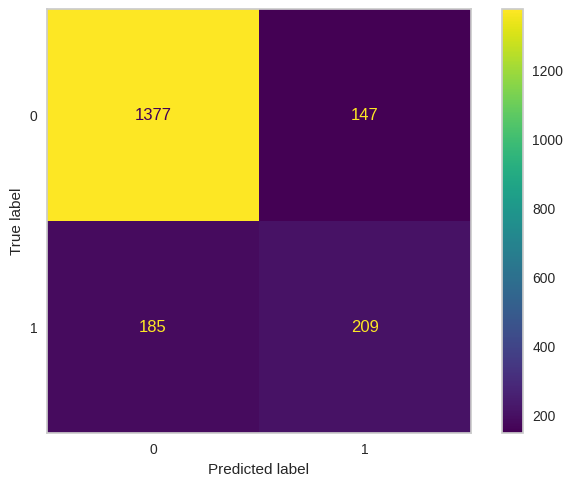

In [372]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.grid(False)

# Deploy

In [378]:
save_model(best, 'churn_predict_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit_score', 'gender', 'age',
                                              'tenure', 'balance',
                                              'products_number', 'credit_card',
                                              'active_member',
                                              'estimated_salary',
                                              'country_France',
                                              'country_Germany',
                                              'country_Spain'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               kee...
              

In [299]:
load_model('churn_predict_model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['credit_score', 'gender', 'age',
                                             'tenure', 'balance',
                                             'products_number', 'credit_card',
                                             'active_member',
                                             'estimated_salary',
                                             'country_France',
                                             'country_Germany',
                                             'country_Spain'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_val...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)